In [3]:
import string 

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/barraharrison/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df = pd.read_csv("spam_ham_dataset.csv")

In [6]:
df["text"] = df["text"].apply(lambda x: x.replace("\r\n", " "))

In [7]:
# We only need the text and label_num columns from the dataset

In [8]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to b...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft the transport vo...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms hpl c...,0
5168,2933,ham,Subject: calpine daily gas nomination > > juli...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


# Data Preprocessing

In [10]:
# Removing the punctuation and turn everything into lowercase

In [11]:
stemmer = PorterStemmer()

In [12]:
stemmer.stem("running")

'run'

In [13]:
stemmer.stem("talking")

'talk'

In [14]:
stemmer.stem("Hello")

'hello'

In [15]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words("english"))

for i in range(len(df)):
    text = df["text"].iloc[i].lower()
    text = text.translate(str.maketrans(" ", " ", string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = " ".join(text)
    corpus.append(text)

In [16]:
df.text.iloc[0]

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [17]:
corpus[0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [18]:
df.text.iloc[1]

'Subject: hpl nom for january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls'

In [19]:
corpus[1]

'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl'

In [20]:
vectorizer = CountVectorizer()

# X data is going to be the email content
X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

# Test Data is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
clf = RandomForestClassifier(n_jobs=-1)
# n_jobs -1 is going to instruct the model to use all the cpu cores (faster)

clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [22]:
# Evaluating the model on the test data
clf.score(X_test, y_test)

0.9777777777777777

In [23]:
# The model performs well (97%)

In [24]:
email_to_classify = df.text.values[2]

In [25]:
email_to_classify

"Subject: neon retreat ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time ! i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute . on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about . i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a pote

In [26]:
# Going to classify the above email as spam or not-spam

In [27]:
email_text = email_to_classify.lower().translate(str.maketrans(" ", " ", string.punctuation)).split()
email_text = [stemmer.stem(word) for word in text if word not in stopwords_set]
email_text = " ".join(email_text)

email_corpus = [email_text]

# Just call transform on the already-fitted vectorizer
X_email = vectorizer.transform(email_corpus)

In [28]:
clf.predict(X_email)

array([1])

In [29]:
df.label_num.iloc[2]

np.int64(0)

# EDA (Exploratory Data Analysis) 

In [30]:
# Looking at the number of spam vs. non-spam emails in the dataset

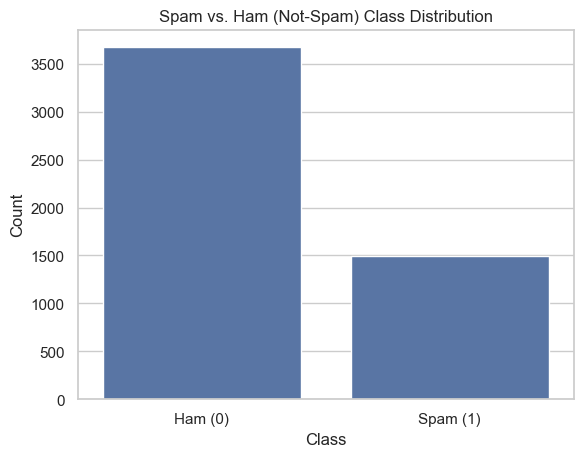

Class distribution (%):
 label_num
0    71.01141
1    28.98859
Name: proportion, dtype: float64


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(data=df, x='label_num')
plt.title('Spam vs. Ham (Not-Spam) Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


class_percentages = df['label_num'].value_counts(normalize=True) * 100
print("Class distribution (%):\n", class_percentages)

In [32]:
# Emails are 71% Not-Spam and 28% are spam

## Word Frequency Analysis

In [33]:
# Using CountVectorizer to get the most frequent words in Ham and Spam Emails

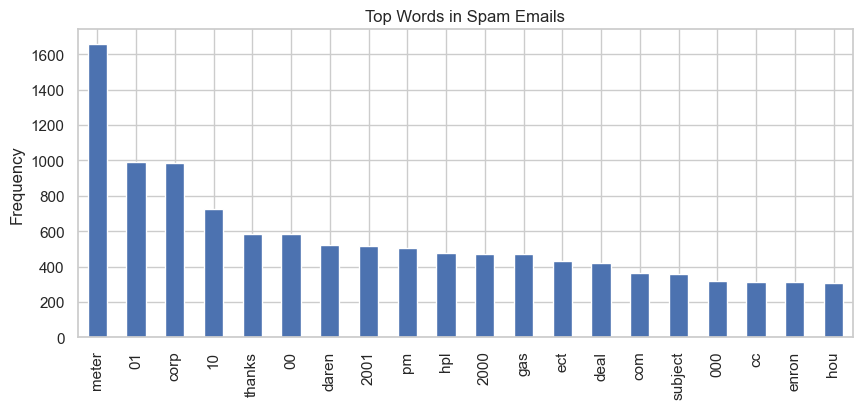

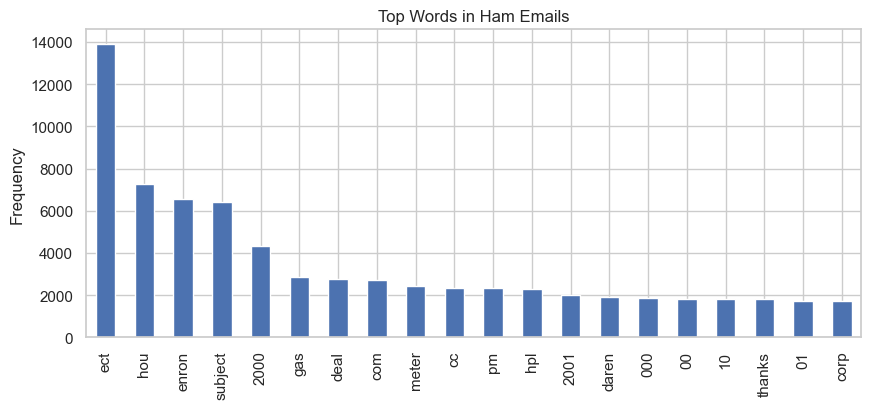

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate spam and ham texts
spam_texts = df[df['label_num'] == 1]['text']
ham_texts = df[df['label_num'] == 0]['text']

# Initialize vectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform
spam_counts = vectorizer.fit_transform(spam_texts)
ham_counts = vectorizer.fit_transform(ham_texts)

# Convert to DataFrame
spam_word_freq = pd.DataFrame(spam_counts.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
ham_word_freq = pd.DataFrame(ham_counts.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Plot top spam words
spam_word_freq.plot(kind='bar', title='Top Words in Spam Emails', figsize=(10, 4))
plt.ylabel("Frequency")
plt.show()

# Plot top ham words
ham_word_freq.plot(kind='bar', title='Top Words in Ham Emails', figsize=(10, 4))
plt.ylabel("Frequency")
plt.show()


## Message Length Distribution

In [35]:
# Looking to see if there is a pattern when it comes to message length

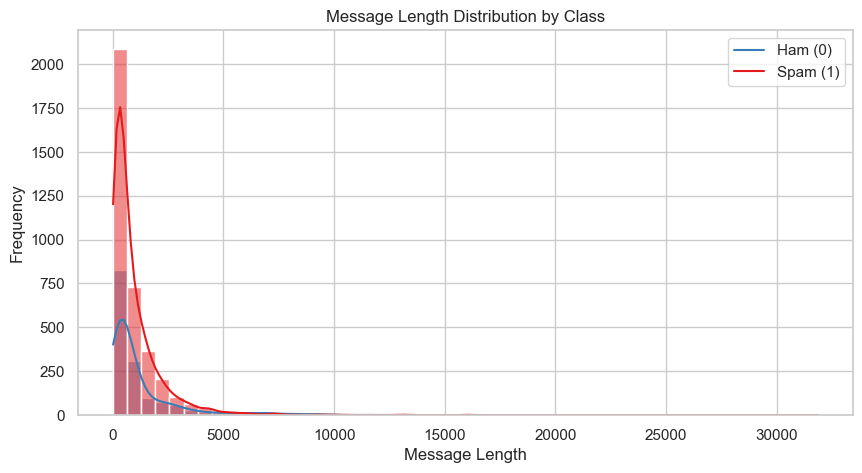

In [36]:
# Add a column for message length
df['message_length'] = df['text'].apply(len)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='message_length', hue='label_num', bins=50, kde=True, palette='Set1')
plt.title('Message Length Distribution by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham (0)', 'Spam (1)'])
plt.show()


In [37]:
# Spam Emails tend to have a shorter length compared to Ham emails

## Advanced Text Preprocessing

In [38]:
# Stemming the words

In [39]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase and tokenize
    words = text.lower().split()
    # Remove stopwords and apply stemming
    filtered_words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Show before and after for a sanity check
df[['text', 'clean_text']].head()


,text,clean_text
0,Subject: enron methanol ; meter # : 988291 thi...,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001 ( see at...",subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat ho ho ho , we ' re aroun...",subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop window offic cheap main tren...
4,Subject: re : indian springs this deal is to b...,subject indian spring deal book teco pvr reven...


In [40]:
# Using TfidfVectorizer to capture term importance

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for performance
X = tfidf.fit_transform(df['clean_text']).toarray()

# Labels
y = df['label_num']


In [42]:
# Re-Training the RandomForestClassifier using the new features

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       742
           1       0.95      0.98      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035


Confusion Matrix:
 [[726  16]
 [  7 286]]


In [44]:
# The Confusion Matrix is showing whether the spam/ham emails were identified correctly or not

### Visualizing the Confusion Matrix

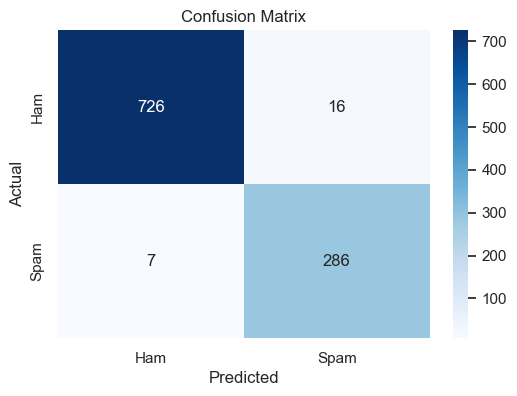

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Model Evaluation & HyperParameter Tuning

### Cross-Validation

In [46]:
# Cross-validation helps evaluate the model’s stability across different splits of the data.

In [47]:
from sklearn.model_selection import cross_val_score

# Use cross-validation on the whole dataset
cross_val_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print scores and average
print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.98164251 0.97969052 0.97775629 0.96324952 0.97388781]
Average Accuracy: 0.975245330268457


In [48]:
# The model is close to the test accuracy, therefore it is generalizing well

### HyperParameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Set up GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Run the search
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate the best model on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy with Tuned Model:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9760647588338035
Test Accuracy with Tuned Model: 0.9816425120772947


### HyperParameter Tuning with Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy (Naive Bayes): 0.957487922705314

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       742
           1       0.91      0.94      0.93       293

    accuracy                           0.96      1035
   macro avg       0.94      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [51]:
# Naive Bayes seems to be less accurate than GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

# Define param grid
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

# Set up GridSearchCV for Naive Bayes
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train, y_train)

# Results
print("Best Alpha:", grid_nb.best_params_)
print("Best Cross-Validation Accuracy:", grid_nb.best_score_)

# Evaluate best model
best_nb = grid_nb.best_estimator_
y_pred_best_nb = best_nb.predict(X_test)
print("Test Accuracy with Tuned Naive Bayes:", accuracy_score(y_test, y_pred_best_nb))


Best Alpha: {'alpha': 0.1}
Best Cross-Validation Accuracy: 0.9605900495943083
Test Accuracy with Tuned Naive Bayes: 0.9565217391304348


### Naive Bayes (Tuned) Vs Random Forest (Tuned)

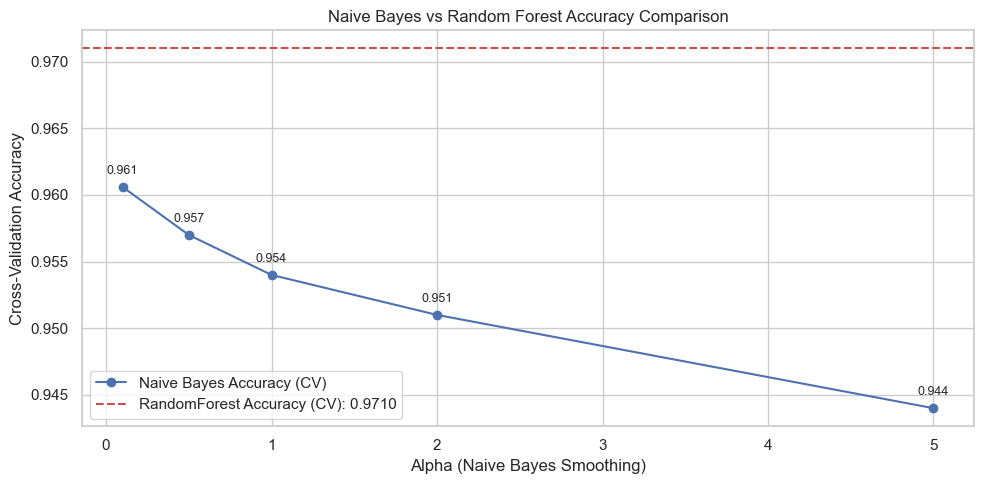

In [53]:
import matplotlib.pyplot as plt

# Alpha values used in GridSearchCV
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Cross-validation accuracies for each alpha 
nb_accuracies = [0.9606, 0.957, 0.954, 0.951, 0.944]

# Best Random Forest cross-validation accuracy
rf_score = 0.971  


plt.figure(figsize=(10, 5))
plt.plot(alpha_values, nb_accuracies, marker='o', label='Naive Bayes Accuracy (CV)')

for i, acc in enumerate(nb_accuracies):
    plt.text(alpha_values[i], acc + 0.001, f'{acc:.3f}', ha='center', fontsize=9)

plt.axhline(y=rf_score, color='r', linestyle='--', label=f'RandomForest Accuracy (CV): {rf_score:.4f}')
plt.xlabel('Alpha (Naive Bayes Smoothing)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Naive Bayes vs Random Forest Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("naive_vs_rf_accuracy.png", dpi=300)
plt.show()


In [54]:
# Naive Bayes does well when the Alpha = 0.1, but the accuracy begins to drop after that

# Feature Engineering

In [55]:
import re

# Number of uppercase words in each message
df['uppercase_words'] = df['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

# Count of punctuation marks
df['punctuation_count'] = df['text'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

# Message length (total number of characters)
df['message_length'] = df['text'].apply(len)

# Ratio of digits to letters
def digit_letter_ratio(text):
    digits = sum(c.isdigit() for c in text)
    letters = sum(c.isalpha() for c in text)
    return digits / letters if letters > 0 else 0

df['digit_to_letter_ratio'] = df['text'].apply(digit_letter_ratio)

# Preview the new engineered features
df[['text', 'uppercase_words', 'punctuation_count', 'message_length', 'digit_to_letter_ratio']].head()


,text,uppercase_words,punctuation_count,message_length,digit_to_letter_ratio
0,Subject: enron methanol ; meter # : 988291 thi...,0,15,322,0.043290
1,"Subject: hpl nom for january 9 , 2001 ( see at...",0,8,95,0.160714
2,"Subject: neon retreat ho ho ho , we ' re aroun...",0,82,2515,0.007487
3,"Subject: photoshop , windows , office . cheap ...",0,5,404,0.000000
4,Subject: re : indian springs this deal is to b...,0,7,332,0.000000


### Feature Distribution Analysis

In [ ]:
# Checking for outliers and skewed distributions
# Trying to understand how these features (uppercase, punctuation, digit-to-letter ratio) differ between spam and ham emails

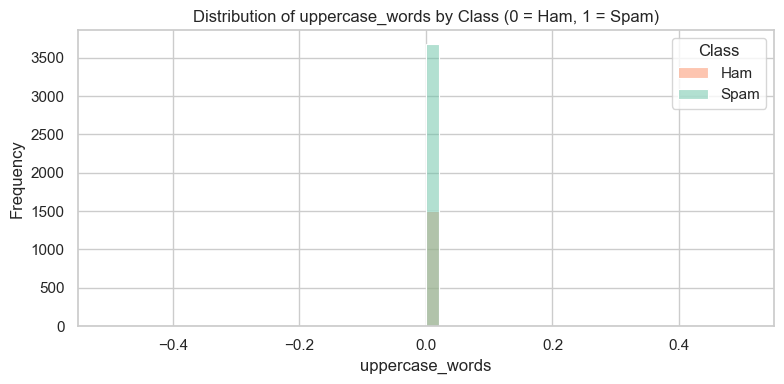

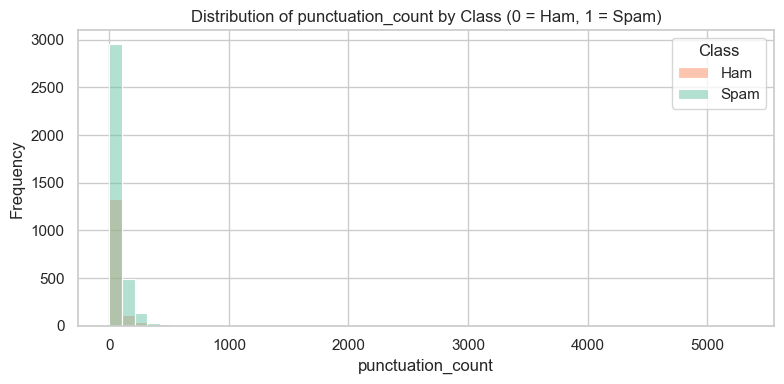

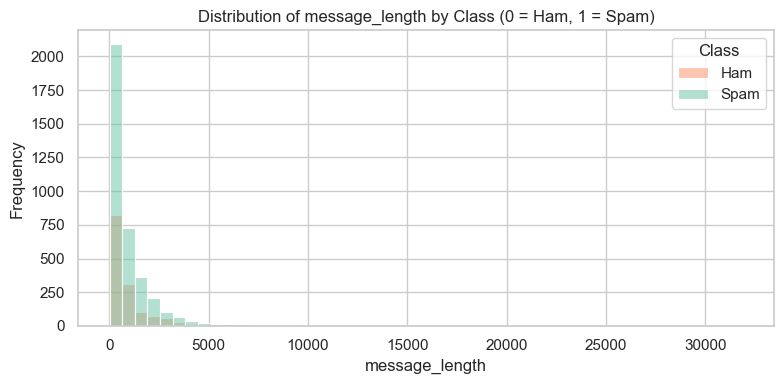

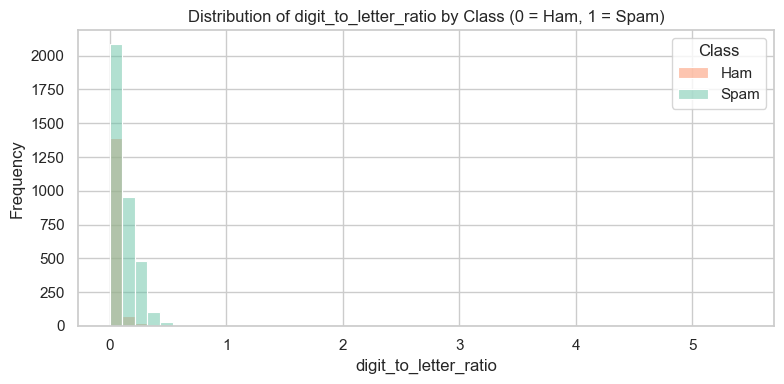

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style='whitegrid')

# Plot each feature distribution by class
features = ['uppercase_words', 'punctuation_count', 'message_length', 'digit_to_letter_ratio']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='label_num', bins=50, palette='Set2')
    plt.title(f'Distribution of {feature} by Class (0 = Ham, 1 = Spam)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Class', labels=['Ham', 'Spam'])
    plt.tight_layout()
    plt.show()